# Software Defect Classification with Ensemble Learning on Selected Features
An implementation for the research paper <a href='https://www.researchgate.net/publication/264459812_Software_Defect_Prediction_using_Ensemble_Learning_on_Selected_Features'>Software Defect Prediction using Ensemble Learning on Selected Features</a>

#### Done By: Mohammed Abed
#### Supervisor: Dr. Lahouari Ghouti
#### Prince Sultan Univesrity

<h2><center><strong>Ensemble Models</strong></center></h2>

In [1]:
import pandas as pd
from scipy.io import arff
from pandas.api.types import is_string_dtype, is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lux

## Read and Preprocess Data

For a more detailed EDA pleaser refer to one of the CLFs notebooks

In [2]:
DATASET_PATH = 'datasets/ant-1.7.csv'

ant_df = pd.read_csv(DATASET_PATH)

In [3]:
ant_df = ant_df.drop(columns = ['name', 'version', 'name.1'], axis = 1)

In [4]:
def check_missing(df):
    df.isnull().sum()
    missing_count = df.isnull().sum() # the count of missing values
    value_count = df.isnull().count() # the count of all values 
    missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
    missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
    return missing_df

check_missing(ant_df)

,count,percentage
wmc,0,0.0
dit,0,0.0
noc,0,0.0
cbo,0,0.0
rfc,0,0.0
lcom,0,0.0
ca,0,0.0
ce,0,0.0
npm,0,0.0
lcom3,0,0.0


In [5]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(ant_df)

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,3.0,1.0,0.0,10.0,18.0,3.0,1.0,9.0,1.0,1.100000,...,0.000000,0.0,0.000000,0.444444,0.0,0.0,32.666667,1.0,0.6667,0.0
1,5.0,2.0,0.0,4.0,13.0,0.0,1.0,4.0,4.0,0.625000,...,1.000000,1.0,0.700000,0.500000,0.0,0.0,13.400000,1.0,0.6000,0.0
2,1.0,2.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,2.000000,...,0.000000,0.0,1.000000,1.000000,0.0,0.0,6.000000,0.0,0.0000,0.0
3,8.0,1.0,9.0,13.0,20.0,12.0,9.0,4.0,8.0,0.800000,...,0.200000,1.0,0.000000,0.406250,0.0,0.0,11.000000,1.0,0.8750,0.0
4,9.0,3.0,0.0,5.0,26.0,16.0,0.0,5.0,7.0,0.750000,...,1.000000,0.0,0.800000,0.388889,0.0,0.0,19.000000,2.0,1.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,92.0,3.0,0.0,34.0,261.0,3726.0,8.0,34.0,81.0,0.960246,...,0.970588,11.0,0.291339,0.112476,2.0,2.0,28.021739,15.0,1.5543,4.0
741,6.0,3.0,6.0,10.0,10.0,3.0,7.0,3.0,6.0,0.400000,...,1.000000,0.0,0.857143,0.500000,0.0,0.0,6.500000,3.0,1.5000,0.0
742,7.0,3.0,5.0,9.0,26.0,0.0,5.0,4.0,6.0,0.000000,...,1.000000,0.0,0.857143,0.314286,1.0,3.0,19.000000,3.0,1.5714,0.0
743,5.0,2.0,0.0,8.0,34.0,8.0,1.0,7.0,3.0,0.500000,...,1.000000,0.0,0.884615,1.000000,0.0,0.0,42.000000,11.0,3.4000,1.0


In [6]:
def convert_target_binary(df):
    df['bug'] = df['bug'].map(
                       {0:0 , 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1 })

convert_target_binary(ant_df)

In [7]:
ant_df

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,3,1,0,10,18,3,1,9,1,1.100000,...,0.000000,0,0.000000,0.444444,0,0,32.666667,1,0.6667,0
1,5,2,0,4,13,0,1,4,4,0.625000,...,1.000000,1,0.700000,0.500000,0,0,13.400000,1,0.6000,0
2,1,2,0,1,3,0,0,1,1,2.000000,...,0.000000,0,1.000000,1.000000,0,0,6.000000,0,0.0000,0
3,8,1,9,13,20,12,9,4,8,0.800000,...,0.200000,1,0.000000,0.406250,0,0,11.000000,1,0.8750,0
4,9,3,0,5,26,16,0,5,7,0.750000,...,1.000000,0,0.800000,0.388889,0,0,19.000000,2,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,92,3,0,34,261,3726,8,34,81,0.960246,...,0.970588,11,0.291339,0.112476,2,2,28.021739,15,1.5543,1
741,6,3,6,10,10,3,7,3,6,0.400000,...,1.000000,0,0.857143,0.500000,0,0,6.500000,3,1.5000,0
742,7,3,5,9,26,0,5,4,6,0.000000,...,1.000000,0,0.857143,0.314286,1,3,19.000000,3,1.5714,0
743,5,2,0,8,34,8,1,7,3,0.500000,...,1.000000,0,0.884615,1.000000,0,0,42.000000,11,3.4000,1


## Data Split 

In [8]:
# set target
target = 'bug'

In [9]:
# set all columns other than the target for X
X = ant_df.loc[:, ant_df.columns!=target]
y = ant_df.loc[:, ant_df.columns==target]

<AxesSubplot:xlabel='bug', ylabel='count'>

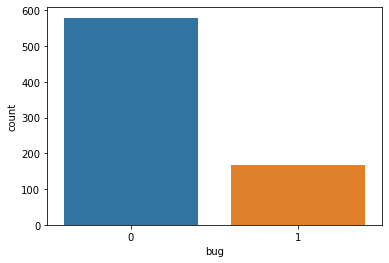

In [10]:
y.value_counts()
sns.countplot(x = 'bug', data = ant_df)

`StratifiedKFoldCV` will be applied to solve classes imbalance issue

<h2><center><strong>Ensemble SVM</strong></center></h2>

In [11]:
! pip install mlxtend

In [22]:
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statistics import mean, stdev
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [13]:
# Data will be scaled with Standard Scaler first
scaler = StandardScaler()

# Feature selection will be applied with 10 - 15 features
sfs = SFS(estimator=SVC(probability = True), 
           k_features=10,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=2)

# Logisitc Regression classifier is trained
clf = SVC(probability = True)

In [14]:
steps = [
    ('sfs', sfs), 
    ('scaler', scaler), 
    ('clf', clf)
]

pipeline = Pipeline(steps)

In [15]:
grid_params = [{
        'sfs__k_features': [10, 15],
        'clf__C': [1, 10, 100, 500, 1000],
        'clf__class_weight': [{1: 5}, {1: 10}, {1: 15}, {1: 20}, {1: 25}]
}]

In [16]:
svc_search = GridSearchCV(pipeline, grid_params, cv = 4)

In [19]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
lst_accu_stratified = []
scores = []
auc_scores = []

for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    # Fit the model
    svc_search.fit(X_train_fold, y_train_fold.values.ravel())
    # Save scores in the list
    lst_accu_stratified.append(svc_search.score(X_test_fold, y_test_fold))
    
    # predict for roc
    y_pred = svc_search.predict(X_test_fold)
    # store the roc score
    scores += [metrics.roc_auc_score(y_test_fold, y_pred)]
    # mean of folds scores
    auc_scores = np.mean(scores)
    
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))
print('\n Mean AUC Score is:', auc_scores)

List of possible accuracy: [0.6951871657754011, 0.7365591397849462, 0.6935483870967742, 0.7903225806451613]

Maximum Accuracy That can be obtained from this model is: 79.03225806451613 %

Minimum Accuracy: 69.35483870967742 %

Overall Accuracy: 72.89043183255707 %

Standard Deviation is: 0.0455254049481523

 Mean AUC Score is: 0.6838634907285033


<h2><center><strong>Random Forest</strong></center></h2>

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Data will be scaled with Standard Scaler first
scaler = StandardScaler()

# Feature selection will be applied with 10 - 15 features
sfs = SFS(estimator=RandomForestClassifier(), 
           k_features=10,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=2)

# Logisitc Regression classifier is trained
clf = RandomForestClassifier()

In [15]:
steps = [
    ('sfs', sfs), 
    ('scaler', scaler), 
    ('rf', clf)
]

pipeline = Pipeline(steps)

In [28]:
# Hyperparameters for GridSearch CV
grid_params = [{
        'rf__n_estimators': [120, 140],
        'rf__max_depth': [30, 50],
        #'rf__min_samples_split': [2, 3],
        #'rf__min_samples_leaf': [3, 5],
        'rf__class_weight': [{0:1, 1:1}, {0:1, 1:5}, {0:1, 1:3}, 'balanced'],
        'sfs__k_features': [10, 15]
}] 

In [29]:
rf_search = GridSearchCV(pipeline, grid_params, cv = 4)

In [16]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
lst_accu_stratified = []
scores = []
auc_scores = []

for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    # Fit the model
    pipeline.fit(X_train_fold, y_train_fold.values.ravel())
    # Save scores in the list
    lst_accu_stratified.append(pipeline.score(X_test_fold, y_test_fold))
    
    # predict for roc
    y_pred = pipeline.predict(X_test_fold)
    # store the roc score
    scores += [metrics.roc_auc_score(y_test_fold, y_pred)]
    # mean of folds scores
    auc_scores = np.mean(scores)
    
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))
print('\n Mean AUC Score is:', auc_scores)

List of possible accuracy: [0.8342245989304813, 0.8225806451612904, 0.8010752688172043, 0.7903225806451613]

Maximum Accuracy That can be obtained from this model is: 83.42245989304813 %

Minimum Accuracy: 79.03225806451613 %

Overall Accuracy: 81.20507733885343 %

Standard Deviation is: 0.01995939878189255

 Mean AUC Score is: 0.683967807581401


<h2><center><strong>Proposed: Heterogeneous Ensembles (APE)</strong></center></h2>
A voting ensemble (or a “majority voting ensemble“) is an ensemble machine learning model that combines the predictions from multiple other models.

It is a technique that may be used to improve model performance, ideally achieving better performance than any single model used in the ensemble.

A voting ensemble works by combining the predictions from multiple models. It can be used for classification or regression. In the case of regression, this involves calculating the average of the predictions from the models. In the case of classification, the predictions for each label are summed and the label with the majority vote is predicted.

<img src = 'https://www.dataquest.io/wp-content/uploads/2019/01/network-1.png'>

<h3><center>Hard vs Soft Voting</center></h3>
Hard Voting: Predict the class with the largest sum of votes from models.

Soft Voting: Predict the class with the largest summed probability from models.

<h3><center>Weighted Average Ensemble</center></h3>
Weighted average or weighted sum ensemble is an ensemble machine learning approach that combines the predictions from multiple models, where the contribution of each model is weighted proportionally to its capability or skill.

<center><img src = 'https://www.researchgate.net/profile/Lahouari-Ghouti/publication/264459812/figure/fig1/AS:807332221054977@1569494409240/The-proposed-framework-for-the-Average-Probability-Ensemble_W640.jpg'>

In [12]:
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

### Split Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50 )

print('Training Set: ', X_train.shape[0])
print('Testing Set: ', X_test.shape[0])

Training Set:  558
Testing Set:  187


### Load Models

In [14]:
bnb = pickle.load(open('models/bnb.sav', 'rb'))
gb = pickle.load(open('models/gb.sav', 'rb'))
lr = pickle.load(open('models/lr.sav', 'rb'))
mnb = pickle.load(open('models/mnb.sav', 'rb'))
rf = pickle.load(open('models/rf.sav', 'rb'))
svc = pickle.load(open('models/svc.sav', 'rb'))
sgd = pickle.load(open('models/sgd.sav', 'rb'))

In [15]:
# get a list of base models
def get_models():
    models = list()
    
    models.append(('bnb', bnb))
    models.append(('gb', gb))
    models.append(('lr', lr))
    models.append(('mnb', mnb))
    models.append(('rf', rf))
    models.append(('sgd', sgd))
    models.append(('svc', svc))
    
    return models

### Find Models Weights on Testing Set

In [23]:
# evaluate each base model
def evaluate_models(models, X_test, y_test):
    # fit and evaluate the models
    scores = list()
    for name, model in models:
        # predict the test set
        yhat = model.predict(X_test)
        # find the accuracy
        acc = accuracy_score(y_test, yhat)
        # store the performance
        scores.append(acc)
        # report model performance
    return scores

based on model scores will be the weight of the model for predictions. The higher the score the higher the weight.

### Build the Weighted Voting Classifier

In [24]:
# get models
models = get_models()

In [25]:
# get models weights
models_scores = evaluate_models(models, X_test, y_test)
print(models_scores)

[0.7754010695187166, 0.93048128342246, 0.8449197860962567, 0.8128342245989305, 0.9411764705882353, 0.839572192513369, 0.8556149732620321]


In [26]:
# create the ensemble weighted voting classifier
ensemble = VotingClassifier(estimators = models, voting = 'soft', weights = models_scores)

### Traininig Pipeline

In [27]:
# Data will be scaled with Standard Scaler first
scaler = MinMaxScaler() # to avoid passing negative values to BNB

# Logisitc Regression classifier is trained
clf = VotingClassifier(estimators = models, voting = 'soft', weights = models_scores)

In [29]:
steps = [
    ('scaler', scaler), 
    ('clf', clf)
]

voting_pipeline = Pipeline(steps)

In [30]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
lst_accu_stratified = []
scores = []
auc_scores = []

for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    # Fit the model
    voting_pipeline.fit(X_train_fold, y_train_fold.values.ravel())
    # Save scores in the list
    lst_accu_stratified.append(voting_pipeline.score(X_test_fold, y_test_fold))
    
    # predict for roc
    y_pred = voting_pipeline.predict(X_test_fold)
    # store the roc score
    scores += [metrics.roc_auc_score(y_test_fold, y_pred)]
    # mean of folds scores
    auc_scores = np.mean(scores)
    
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))
print('\n Mean AUC Score is:', auc_scores)

List of possible accuracy: [0.8609625668449198, 0.8225806451612904, 0.8118279569892473, 0.8172043010752689]

Maximum Accuracy That can be obtained from this model is: 86.09625668449198 %

Minimum Accuracy: 81.18279569892472 %

Overall Accuracy: 82.81438675176815 %

Standard Deviation is: 0.022315163147048334

 Mean AUC Score is: 0.6835661637096666
